## Schools Distribution on Map, Rwanda

In [74]:
import plotly.plotly as py
import plotly 
import plotly.graph_objs as go
import geopandas as gpd
from shapely.geometry import LineString, MultiLineString
import pandas as pd
import numpy as np

In [50]:
level = 2
gdf = gpd.read_file(f"gadm36_RWA_shp/gadm36_RWA_{level}.shp", encoding='utf-8')
gdf.head()

,GID_0,NAME_0,GID_1,NAME_1,NL_NAME_1,GID_2,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2,geometry
0,RWA,Rwanda,RWA.1_1,Amajyaruguru,None,RWA.1.1_1,Burera,None,None,District,District,44,RW.NO.BR,"POLYGON ((29.98634529 -1.57467997, 29.98603821..."
1,RWA,Rwanda,RWA.1_1,Amajyaruguru,None,RWA.1.2_1,Gakenke,None,None,District,District,42,RW.NO.GK,"POLYGON ((29.71752357 -1.75552619, 29.71744728..."
2,RWA,Rwanda,RWA.1_1,Amajyaruguru,None,RWA.1.3_1,Gicumbi,None,None,District,District,45,RW.NO.GC,"POLYGON ((29.99971962 -1.65904367, 29.99971771..."
3,RWA,Rwanda,RWA.1_1,Amajyaruguru,None,RWA.1.4_1,Musanze,None,None,District,District,43,RW.NO.MS,"POLYGON ((29.7530632 -1.57449818, 29.75311089 ..."
4,RWA,Rwanda,RWA.1_1,Amajyaruguru,None,RWA.1.5_1,Rulindo,None,None,District,District,41,RW.NO.RL,"POLYGON ((30.03483009 -1.86027956, 30.03462791..."


In [51]:
geo_names = list(gdf[f'NAME_{level}'])
geo_names

['Burera',
 'Gakenke',
 'Gicumbi',
 'Musanze',
 'Rulindo',
 'Gisagara',
 'Huye',
 'Kamonyi',
 'Muhanga',
 'Nyamagabe',
 'Nyanza',
 'Nyaruguru',
 'Ruhango',
 'Bugesera',
 'Gatsibo',
 'Kayonza',
 'Kirehe',
 'Ngoma',
 'Nyagatare',
 'Rwamagana',
 'Karongi',
 'Ngororero',
 'Nyabihu',
 'Nyamasheke',
 'Rubavu',
 'Rusizi',
 'Rutsiro',
 'Gasabo',
 'Kicukiro',
 'Nyarugenge']

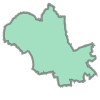

In [52]:
gdf['geometry'][0]

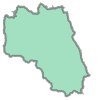

In [53]:
gdf['geometry'][1]

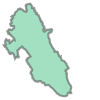

In [54]:
gdf['geometry'][2]

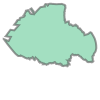

In [55]:
gdf['geometry'][3]

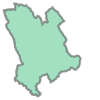

In [56]:
gdf['geometry'][4]

In [57]:
df = pd.read_csv('schools_map.csv')
df.head()

,level,district,region,schools_2016,pupils_2016,schools_2017,pupils_2017
0,Nursery,Bugesera,Amajyepfo,32,"2,358",41,3358
1,Nursery,Burera,Amajyepfo,101,6067,92,7333
2,Nursery,Gakenke,Amajyepfo,75,5389,118,9487
3,Nursery,Gasabo,Amajyepfo,114,7009,139,9638
4,Nursery,Gatsibo,Amajyepfo,78,5975,87,6607


In [58]:
df.schools_2017.count()

30

In [59]:
gdf['vals']= list(df['schools_2017'])

In [60]:
gdf.head()

,GID_0,NAME_0,GID_1,NAME_1,NL_NAME_1,GID_2,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2,geometry,vals
0,RWA,Rwanda,RWA.1_1,Amajyaruguru,None,RWA.1.1_1,Burera,None,None,District,District,44,RW.NO.BR,"POLYGON ((29.98634529 -1.57467997, 29.98603821...",41
1,RWA,Rwanda,RWA.1_1,Amajyaruguru,None,RWA.1.2_1,Gakenke,None,None,District,District,42,RW.NO.GK,"POLYGON ((29.71752357 -1.75552619, 29.71744728...",92
2,RWA,Rwanda,RWA.1_1,Amajyaruguru,None,RWA.1.3_1,Gicumbi,None,None,District,District,45,RW.NO.GC,"POLYGON ((29.99971962 -1.65904367, 29.99971771...",118
3,RWA,Rwanda,RWA.1_1,Amajyaruguru,None,RWA.1.4_1,Musanze,None,None,District,District,43,RW.NO.MS,"POLYGON ((29.7530632 -1.57449818, 29.75311089 ...",139
4,RWA,Rwanda,RWA.1_1,Amajyaruguru,None,RWA.1.5_1,Rulindo,None,None,District,District,41,RW.NO.RL,"POLYGON ((30.03483009 -1.86027956, 30.03462791...",87


In [61]:
pl_deep=[[0.0, 'rgb(253, 253, 204)'],
         [0.1, 'rgb(201, 235, 177)'],
         [0.2, 'rgb(145, 216, 163)'],
         [0.3, 'rgb(102, 194, 163)'],
         [0.4, 'rgb(81, 168, 162)'],
         [0.5, 'rgb(72, 141, 157)'],
         [0.6, 'rgb(64, 117, 152)'],
         [0.7, 'rgb(61, 90, 146)'],
         [0.8, 'rgb(65, 64, 123)'],
         [0.9, 'rgb(55, 44, 80)'],
         [1.0, 'rgb(39, 26, 44)']]

In [63]:
from ast import literal_eval
def get_color_for_val(val, vmin, vmax, pl_colorscale):
    
    if vmin >= vmax:
        raise ValueError('vmin should be < vmax')
        
    plotly_scale, plotly_colors = (list(map(float, np.array(pl_colorscale)[:,0])), 
                                   np.array(pl_colorscale)[:,1]) 
    colors_01=np.array(list(map(literal_eval,[color[3:] for color in plotly_colors] )))/255.   #color codes in [0,1]
    
    v= (val - vmin) / float((vmax - vmin)) # val is mapped to v in [0,1]
    #find two consecutive values in plotly_scale such that   v is in  the corresponding interval
    idx = 0
   
    while(v > plotly_scale[idx+1]): 
        idx += 1
    left_scale_val = plotly_scale[idx]
    right_scale_val = plotly_scale[idx+ 1]
    vv = (v - left_scale_val) / (right_scale_val - left_scale_val)
    
    #get   [0,1]-valued color code representing the rgb color corresponding to val
    val_color01 = colors_01[idx] + vv * (colors_01[idx + 1] - colors_01[idx])
    val_color_0255 = list(map(np.uint8, 255*val_color01+0.5))
    return f'rgb{str(tuple(val_color_0255))}'

In [65]:
def get_choropleth_data(gdf, index_list, col_names= f'NAME_{level}', tolerance=0.025, col_vals='vals',
                        val_name='val', colorscale=pl_deep,   linewidth=0.75, 
                        linecolor= 'rgb(100, 100, 100)', colorbar=True):  
    # gdf - geopandas dataframe containing at least the geometry column and the column values to be mapped to a colorscale
    # index_list - a sublist of list(gdf.index) for the  geometries to be plotted; gdf.index for all data in gdf
    # col_names - string defining the gdf column  of county/region names
    # tolerance - float parameter to set the Polygon/MultiPolygon degree of simplification
    # col_vals - string that gives the gdf column name for values to be mapped to the colorscale
    # val_name - string to be displayed on hover above a centroid ; specifies what displayed value represent
    # colorscale - a  colorscale explicitly defined, not a Plotly coloscale name given as string, such as 'Viridis'
    # linecolor - color code for region/county boundary line
    # returns len(index_list) traces for filled regions, plus the centroids trace, and optionally a dummy trace for colorbar
    
    cdata = []
    x_centroids = []
    y_centroids = []
    centro_tooltip = []
    vmin, vmax = gdf[col_vals].min(),  gdf[col_vals].max()
    
    for index in index_list:
        geo = gdf['geometry'][index].simplify(tolerance)
        xb = []
        yb = []
        c_x, c_y = geo.centroid.xy
        if isinstance(geo.boundary, LineString):
            xc, yc = geo.boundary.coords.xy
            xb.extend(xc.tolist()+[None])
            yb.extend(yc.tolist()+ [None])
        elif  isinstance(geo.boundary, MultiLineString): 
            for b in geo.boundary:
                xc, yc = b.coords.xy
                xb.extend(xc.tolist()+[None])
                yb.extend(yc.tolist()+ [None])
        else:
            raise ValueError('Unknown boundary type')
            
        x_centroids.extend(list(c_x))
        y_centroids.extend(list(c_y))
       
        centro_tooltip.append(f"{gdf[col_names][index]}<br>{val_name}: {round(gdf['vals'][index], 2)}")
        color = get_color_for_val(gdf[col_vals][index], vmin, vmax, colorscale) 
       
        
        region = go.Scatter(# choropleth trace
                            showlegend = False,
                            mode='lines',
                            line = dict(color=linecolor, width=linewidth),
                            x=list(xb),
                            y=list(yb),
                            fill='toself',
                            fillcolor = color,
                            hoverinfo='none')
        
        cdata.append(region)
    #define the trace of state centers. Since we have to update the Brandenburg center position we cannot define
    #this trace as a go.Scatter instance because fig.data cannot be updated
    centroids = dict(type='scatter',
                     mode='markers',
                     showlegend=False,
                     text= centro_tooltip,
                     marker = dict(size=6, color='white', opacity=0),
                     x=x_centroids,
                     y=y_centroids,
                     hoverinfo='text')  
    if colorbar:
        dummy_tr = go.Scatter(#type='scatter',
                        x=[xb[0], xb[0]],
                        y=[yb[0], yb[0]],
                        showlegend=False, 
                        mode='markers',
                        name='',
                        marker=dict(size=0, color=[vmin, vmax], colorscale=colorscale,
                                colorbar=dict(thickness=20, ticklen=4)),
                        hoverinfo='none')
    
        cdata.extend([centroids, dummy_tr]) 
    else:
        cdata.append(centroids)
    return cdata

In [68]:
data = get_choropleth_data(gdf, gdf.index, linecolor='rgb(100,100,100)', linewidth=1, 
                           colorscale=pl_deep, val_name='schools_2017')
#move upward the point pointing the state Brandenburg, to be distinct from Berlin;
#the shapefile data recorded the Brandenburg state center inside the state Berlin

In [69]:
axis_style = dict(showgrid=False, ticklen=4)
layout = dict(title='Germany choropleth map from a shapefile',
              font=dict(family='Balto', size=14),
              hovermode = 'closest',
              xaxis = dict(axis_style, **dict(range=[5.5, 15.5], title='lon')),
              yaxis = dict(axis_style, **dict(range=[47, 56], title='lat')),
              width = 550,
              height = 700,
              plot_bgcolor='#F3F6FA')

In [77]:
import plotly 
#py.tools.set_credentials_file('maryse', 'KgUHxQr1GAukfC3y7lgH')
py.sign_in('maryse', 'KgUHxQr1GAukfC3y7lgH')

In [78]:
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='choropleth-shapefile')